In [9]:
#Import basic libraries
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import json
#from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
#from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
# 1. CryptoCompare API call for historical Hours 
# Function for CryptoCompare HistoMinute API request

def get_histohour_data(exchange, fromPair, toPair):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit=2000&aggregate=1&e={}'
    response = requests.post(url.format(fromPair, toPair, exchange))
    data = json.loads(response.content)
    df = pd.DataFrame.from_dict(data["Data"], orient="columns")
    
    return pd.DataFrame(df)

In [21]:
# json list to pandas dataframe
price_data = {}
pairs = ['LTC','BCH','ETC','ETH','LSK','OMG','XMR','XRP','ZEC']
for pair in pairs:
    price_data[pair] = get_histohour_data('Poloniex', pair, 'BTC')

In [23]:
price_data['ETC'].head()

,close,high,low,open,time,volumefrom,volumeto
0,0.001864,0.001877,0.001844,0.001857,1510120800,20856.19,38.78
1,0.001871,0.001880,0.001860,0.001864,1510124400,3823.17,7.16
2,0.001885,0.001894,0.001871,0.001871,1510128000,3996.42,7.54
3,0.001887,0.001914,0.001876,0.001885,1510131600,22379.73,42.52
4,0.001875,0.001891,0.001865,0.001887,1510135200,3510.23,6.58


### Function to merge dataframes into a single dataframe
* dataframes: multiple dataframe inside of dictionary
* labels: dictionary's labels
* col: column to merge into a new dataframe


In [31]:
# Function to merge dataframes into a single dataframe
def merge_dfs_on_column(dataframes, labels, col): 
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)): #index = rowIndex
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [32]:
df = merge_dfs_on_column(list(price_data.values()), list(price_data.keys()), 'close')

In [34]:
df.shape

(2001, 9)

### Shift price data and label price movements

In [35]:
for pair in pairs:
    df[pair+"next"] = df[pair].shift(-1)

In [37]:
#Confirm if the labels added. 
df.columns

Index(['BCH', 'ETC', 'ETH', 'LSK', 'LTC', 'OMG', 'XMR', 'XRP', 'ZEC',
       'LTCnext', 'BCHnext', 'ETCnext', 'ETHnext', 'LSKnext', 'OMGnext',
       'XMRnext', 'XRPnext', 'ZECnext'],
      dtype='object')

In [39]:
# Add next price move columns for each coin
for pair in pairs:
    df[pair+'move'] = '0'
    df.loc[df[pair] < df[pair+'next'], pair+'move'] = '1'
    df.loc[df[pair] > df[pair+'next'], pair+'move'] = '-1'
    df.loc[df[pair] == df[pair+'next'], pair+'move'] = '0'

In [40]:
df2 = df[['BCHmove', 'ETCmove', 'ETHmove', 'LSKmove', 'LTCmove', 'OMGmove', 'XMRmove', 'XRPmove', 'ZECmove']].copy()
df2 = df2.apply(pd.to_numeric)

In [41]:
df2.corr()

,BCHmove,ETCmove,ETHmove,LSKmove,LTCmove,OMGmove,XMRmove,XRPmove,ZECmove
BCHmove,1.000000,0.272106,0.308709,0.107721,0.220194,0.160346,0.182705,0.217194,0.264408
ETCmove,0.272106,1.000000,0.327053,0.127372,0.232851,0.198335,0.246640,0.243741,0.225424
ETHmove,0.308709,0.327053,1.000000,0.143433,0.270618,0.234290,0.238268,0.302539,0.277926
LSKmove,0.107721,0.127372,0.143433,1.000000,0.112828,0.159566,0.138105,0.143353,0.154919
LTCmove,0.220194,0.232851,0.270618,0.112828,1.000000,0.188108,0.191495,0.212495,0.237615
OMGmove,0.160346,0.198335,0.234290,0.159566,0.188108,1.000000,0.154045,0.184345,0.170765
XMRmove,0.182705,0.246640,0.238268,0.138105,0.191495,0.154045,1.000000,0.187253,0.241121
XRPmove,0.217194,0.243741,0.302539,0.143353,0.212495,0.184345,0.187253,1.000000,0.190956
ZECmove,0.264408,0.225424,0.277926,0.154919,0.237615,0.170765,0.241121,0.190956,1.000000


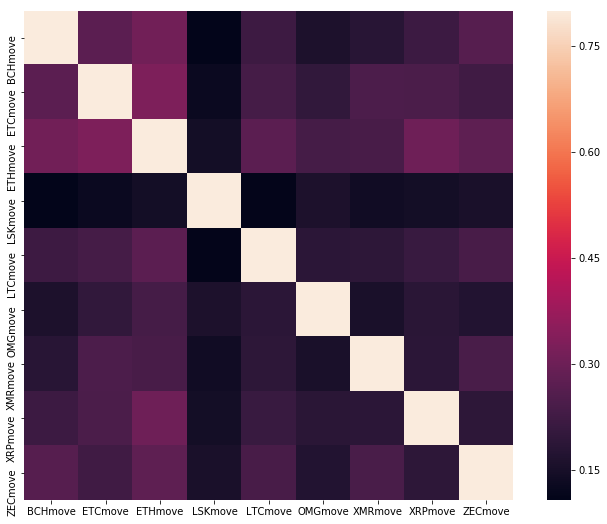

In [42]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

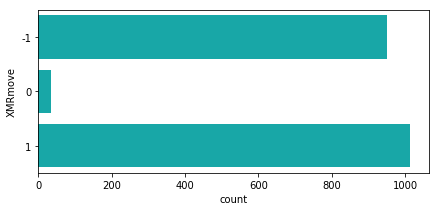

In [49]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="XMRmove", data=df2, color="c");

In [50]:
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

print(__doc__)

import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Automatically created module for IPython interactive environment


### Prepare data sets for training and testing

In [73]:
dfset = {}

In [74]:
df2.columns

Index(['BCHmove', 'ETCmove', 'ETHmove', 'LSKmove', 'LTCmove', 'OMGmove',
       'XMRmove', 'XRPmove', 'ZECmove', 'LTC1',
       ...
       'ZEC8', 'LTC9', 'BCH9', 'ETC9', 'ETH9', 'LSK9', 'OMG9', 'XMR9', 'XRP9',
       'ZEC9'],
      dtype='object', length=198)

In [75]:
for j in (str(x) for x in range(1,11)):
    dfset[j] = pd.DataFrame()
    for pair in pairs:
        df2[pair+j] = df2[pair+'move'].rolling(min_periods=1,window=int(j)).sum()
        dfset[j][pair+j] = df2[pair+j]

##### Approach 1

In [64]:
# Making new columns with previous five price move for each pair
# acc = pd.DataFrame(columns=('nrows','feeds','rates'))

#Model KNN Classifier, the number of neighbors=3
knn = KNeighborsClassifier(n_neighbors = 3)

rows = []
columns = ['nrows','feeds', 'scores']

for i in ['100','200','400','800','1000','1200','1500','2000']:
    for j in (str(x) for x in range(1,11)):
        dfin = dfset[j].head(int(i))
        X = dfin.drop('BCH'+j,axis=1)
        Y = dfset['1']['BCH1'].head(int(i))
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=18)#42 #12
        
        modelV = knn.fit(X_train, Y_train)
        Y_pred = modelV.predict(X_test)
        score = modelV.score(X_test,Y_test)*100
        
        print(i,j,score)
        row = [i,j,score]
        rows.append(row)

acc = pd.DataFrame(rows, columns=columns)

100 1 73.3333333333
100 2 40.0
100 3 56.6666666667
100 4 60.0
100 5 60.0
100 6 46.6666666667
100 7 63.3333333333
100 8 63.3333333333
100 9 73.3333333333
100 10 50.0
200 1 63.3333333333
200 2 50.0
200 3 46.6666666667
200 4 50.0
200 5 58.3333333333
200 6 45.0
200 7 55.0
200 8 58.3333333333
200 9 60.0
200 10 56.6666666667
400 1 65.8333333333
400 2 58.3333333333
400 3 53.3333333333
400 4 52.5
400 5 53.3333333333
400 6 51.6666666667
400 7 48.3333333333
400 8 45.0
400 9 53.3333333333
400 10 50.8333333333
800 1 66.6666666667
800 2 50.8333333333
800 3 52.5
800 4 45.8333333333
800 5 46.6666666667
800 6 52.5
800 7 50.0
800 8 52.0833333333
800 9 52.0833333333
800 10 45.4166666667
1000 1 53.6666666667
1000 2 52.3333333333
1000 3 55.3333333333
1000 4 47.6666666667
1000 5 48.3333333333
1000 6 52.6666666667
1000 7 54.6666666667
1000 8 53.6666666667
1000 9 49.0
1000 10 50.3333333333
1200 1 61.9444444444
1200 2 55.0
1200 3 53.6111111111
1200 4 54.4444444444
1200 5 49.1666666667
1200 6 48.8888888889
120

In [68]:
acc.head()

,nrows,feeds,scores
0,100,1,73.333333
1,100,2,40.000000
2,100,3,56.666667
3,100,4,60.000000
4,100,5,60.000000


In [65]:
acc['feeds'] = pd.to_numeric(acc['feeds'])

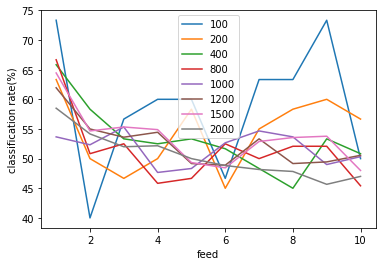

In [69]:
fig,ax = plt.subplots()

for nrow in ['100','200','400','800','1000','1200','1500','2000']:
    ax.plot(acc[acc.nrows==nrow].feeds,acc[acc.nrows==nrow].scores,label=nrow)

ax.set_xlabel("feed")
ax.set_ylabel("classification rate(%)")
ax.legend(loc='best')

##### Approach 2: Train a model with 90K, 60K, 30K then apply them to recent 10K records as a test set

In [79]:
dfset['1'].iloc[0:]

,LTC1,BCH1,ETC1,ETH1,LSK1,OMG1,XMR1,XRP1,ZEC1
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
2,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [92]:
# Making new columns with previous five price move for each pair
# acc = pd.DataFrame(columns=('nrows','feeds','rates'))

#knn = KNeighborsClassifier(n_neighbors = 3)
forest = RandomForestClassifier(n_estimators = 18)
#boost = GradientBoostingClassifier()

rows = []
columns = ['nrows','feeds', 'scores']

for i in ['100','200','400','800','1000','1200','1500','2000']:
    for j in (str(x) for x in range(1,11)):
        toIdx = int(i)
        #fromIdx = toIdx-10000
        
        X_train = dfset[j].iloc[0:toIdx,1:9]
        y_train = dfset['1']['BCH1'].iloc[0:toIdx]
        
        model = forest.fit(X_train,y_train)
        
        dfin = dfset[j].iloc[0:10000,:]
        
        X_test = dfin.drop('BCH'+j,axis=1)
        y_test = dfset['1']['BCH1'].iloc[0:10000]
        
        Y_pred = model.predict(X_test)
        score = model.score(X_test,y_test)*100 
    
        row = [i,j,score]
        rows.append(row)

acc = pd.DataFrame(rows, columns=columns)

##### 1.KNN result

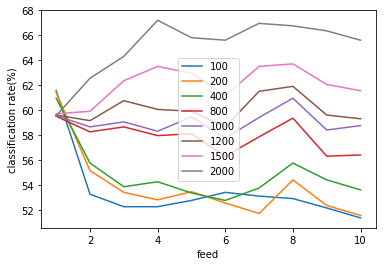

In [82]:
acc['feeds'] = pd.to_numeric(acc['feeds'])

fig,ax = plt.subplots()

for nrow in ['100','200','400','800','1000','1200','1500','2000']:
    ax.plot(acc[acc.nrows==nrow].feeds,acc[acc.nrows==nrow].scores,label=nrow)

ax.set_xlabel("feed")
ax.set_ylabel("classification rate(%)")
ax.legend(loc='best')


### Test to draw confusion matrix

In [89]:
X_train = dfset['4'].iloc[0:2000,1:9]
y_train = dfset['1']['BCH1'].iloc[0:2000]
        
dfin = dfset['4'].iloc[0:2000,:]
        
X_test = dfin.drop('BCH'+'4',axis=1)
y_test = dfset['1']['BCH1'].iloc[0:2000]

In [90]:
model =KNeighborsClassifier(n_neighbors = 3)
modelV = model.fit(X_train, y_train)
Y_pred = modelV.predict(X_test)
print(round(modelV.score(X_test,y_test)*100,3))


67.25


Confusion matrix, without normalization
[[711   0 329]
 [ 31   3  13]
 [280   2 631]]
Normalized confusion matrix
[[ 0.68  0.    0.32]
 [ 0.66  0.06  0.28]
 [ 0.31  0.    0.69]]


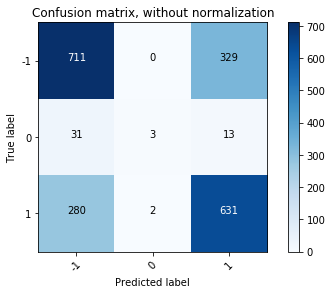

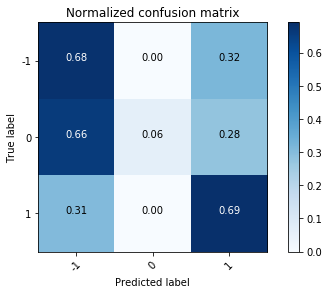

In [91]:
# Plot fonfusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1,0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1,0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

##### 2.Random Forest

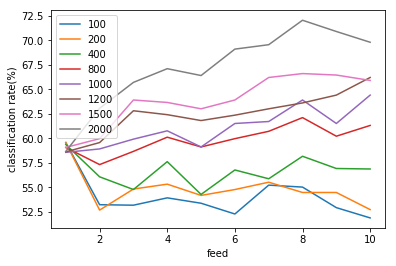

In [93]:
acc['feeds'] = pd.to_numeric(acc['feeds'])

fig,ax = plt.subplots()

for nrow in ['100','200','400','800','1000','1200','1500','2000']:
    ax.plot(acc[acc.nrows==nrow].feeds,acc[acc.nrows==nrow].scores,label=nrow)

ax.set_xlabel("feed")
ax.set_ylabel("classification rate(%)")
ax.legend(loc='best')


### Test to draw confusion matrix

In [98]:
X_train = dfset['8'].iloc[0:2000,1:9]
y_train = dfset['1']['BCH1'].iloc[0:2000]
        
dfin = dfset['8'].iloc[0:2000,:]
        
X_test = dfin.drop('BCH'+'8',axis=1)
y_test = dfset['1']['BCH1'].iloc[0:2000]

In [99]:
model = RandomForestClassifier(n_estimators = 18)
modelV = model.fit(X_train, y_train)
Y_pred = modelV.predict(X_test)
print(round(modelV.score(X_test,y_test)*100,3))


70.3


Confusion matrix, without normalization
[[782   0 258]
 [ 26   7  14]
 [296   0 617]]
Normalized confusion matrix
[[ 0.75  0.    0.25]
 [ 0.55  0.15  0.3 ]
 [ 0.32  0.    0.68]]


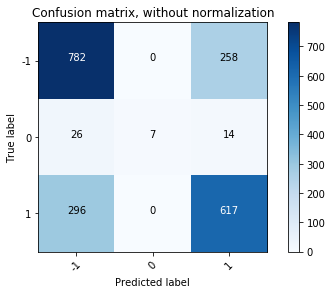

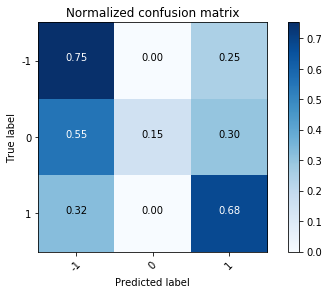

In [100]:
# Plot fonfusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1,0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1,0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()